# HW3: Part 2a. PyTorch Neural Network without Auto Differentiation

##CMPE-258: Deep Learning, Vijay Eranti
##Samer Baslan
##SJSU Spring 2021

#Reference: https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing#scrollTo=sqVW5Nezc8GZ

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, num_hidden)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(num_hidden, 1)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3

In [ ]:
#Define 3d plot graph
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


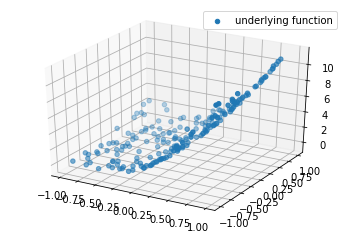

In [ ]:
#Make nonlinear data
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

In [ ]:
loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(17.3131, grad_fn=<MseLossBackward>)


Test just one step forward and one backwards step

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(17.3131, grad_fn=<MseLossBackward>)
tensor(13.7850, grad_fn=<MseLossBackward>)


Now run the training loop

In [ ]:
from typing import Callable

tensor(13.7850, grad_fn=<MseLossBackward>)
tensor(11.1934, grad_fn=<MseLossBackward>)
tensor(9.6361, grad_fn=<MseLossBackward>)
tensor(8.7289, grad_fn=<MseLossBackward>)
tensor(7.5337, grad_fn=<MseLossBackward>)
tensor(5.9261, grad_fn=<MseLossBackward>)
tensor(4.1800, grad_fn=<MseLossBackward>)
tensor(2.6569, grad_fn=<MseLossBackward>)
tensor(1.6057, grad_fn=<MseLossBackward>)
tensor(0.9914, grad_fn=<MseLossBackward>)
tensor(0.6945, grad_fn=<MseLossBackward>)
tensor(0.6506, grad_fn=<MseLossBackward>)
tensor(1.5778, grad_fn=<MseLossBackward>)
tensor(8.4272, grad_fn=<MseLossBackward>)
tensor(17.7329, grad_fn=<MseLossBackward>)
tensor(14.7618, grad_fn=<MseLossBackward>)
tensor(13.1851, grad_fn=<MseLossBackward>)
tensor(12.1827, grad_fn=<MseLossBackward>)
tensor(11.5389, grad_fn=<MseLossBackward>)
tensor(11.1219, grad_fn=<MseLossBackward>)
tensor(10.8472, grad_fn=<MseLossBackward>)
tensor(10.6604, grad_fn=<MseLossBackward>)
tensor(10.5265, grad_fn=<MseLossBackward>)
tensor(10.4241, grad_fn

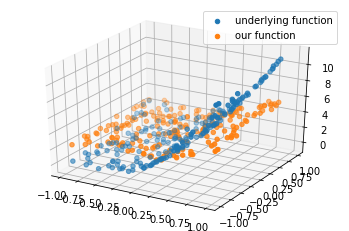

In [ ]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss : Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr = lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model = model, loss = loss, lr = 0.1, num_epochs = 40)
plot_3d(x, y_true, model(x_tensor).detach())